# <center>__Assignment 4__</center>

In [1]:
"""load the required packages"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import euclidean_distances, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from  sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

## Question 1

### a)	Read the data provided on canvas into Python as follows: 

![Load Data](load_data.png)

Print the first 5 rows of each dataset to inspect the nature of data

In [2]:
"""load the data into Python"""

delivery_train = pd.read_csv('delivery_time_train_data.csv')
delivery_test = pd.read_csv('delivery_time_test_data.csv')
student_train = pd.read_csv('student_test_data.csv')
student_test = pd.read_csv('student_test_data.csv')

In [3]:
"""print the first 5 rows of delivery_train"""

delivery_train.head(5)

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [4]:
"""print the first 5 row of delivery test"""

delivery_test.head(5)

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [5]:
"""print the first 5 rows of student train"""

student_train.head(5)

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


In [6]:
"""print the first 5 rows of student_test"""

student_test.head(5)

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


### b)	Split the data into training and test set as follows:

![Training Test](training_test.png)

Print the shape of input and output data for the training and test sets

In [7]:
"""split the data into training and test sets"""

X_delivery_train = delivery_train[['Miles', 'Deliveries']]
y_delivery_train = delivery_train[['Time']]

X_delivery_test = delivery_test[['Miles', 'Deliveries']]
y_delivery_test = delivery_test[['Time']]

X_student_train = student_train[['GPA', 'Age']]
y_student_train = student_train[['Dropped']]

X_student_test = student_test[['GPA', 'Age']]
y_student_test = student_test[['Dropped']]

In [8]:
"""print the shape of the data"""

print("x_delivery_train shape: ", X_delivery_train.shape)
print()
print("y_delivery_train shape: ", y_delivery_train.shape)
print()
print("x_delivery_test shape: ", X_delivery_test.shape)
print()
print("y_delivery_test shape: ", y_delivery_test.shape)
print()
print("x_student_train shape: ", X_student_train.shape)
print()
print("y_student_train shape: ", y_student_train.shape)
print()
print("x_student_test shape: ", X_student_test.shape)
print()
print("y_student_test shape: ", y_student_test.shape)


x_delivery_train shape:  (199, 2)

y_delivery_train shape:  (199, 1)

x_delivery_test shape:  (101, 2)

y_delivery_test shape:  (101, 1)

x_student_train shape:  (100, 2)

y_student_train shape:  (100, 1)

x_student_test shape:  (100, 2)

y_student_test shape:  (100, 1)


### c)	You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:

- X_train: Pandas DataFrame or 2D NumPy array 
- y_train: Pandas Series or 1D NumPy array 
- X_test: Pandas DataFrame or 2D NumPy array
- K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call.


Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:

![Psuedo Code](psuedo_code.png)

In [9]:
"""KNN Regressor function"""

def knn_predict(X_train, y_train, X_test, y_test, k=5):

    # instantiate a list to store predictions
    y_pred = []
    # ensure feature sets converted to numpy array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    # use for loop to iterate over all test instances
    for i in range(0, len(X_test)):
        # get test instance i from test data
        test_instance = np.array([X_test[i]])
        # find the distance between the test instance and all the training instances
        distance = euclidean_distances(X_delivery_train, test_instance)
        # stack the distances with Y_train to create matrix
        stacked = np.stack((y_delivery_train.Time.values, distance.flatten()), axis=1)
        # sort the distances, ascendign then find select the first k values
        stacked = stacked[np.argsort(stacked[:, -1])]
        k_neighbors = stacked[0:k, 0]
        # make a prediction and append to y_pred
        y_pred.append(np.mean(k_neighbors))
    return y_pred

y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train,
                                                       X_delivery_test, y_delivery_test)       

### d)	Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred). The mean squared error (mse) is calculated as follows:

$$mse=\frac{1}{n}\sum_{i=1}^n (y-y_{pred})^2 \space \space where \space n=len(y)$$

In [10]:
"""function to compute the mean squared error for predicitons"""

def mse(y_delivery_test, y_delivery_test_pred):
    
    # get length of input test data "n"
    n = len(y_delivery_test)
    # take the difference between observed and prredicted values element-wise
    diff = np.subtract(np.array(y_delivery_test).flatten(), np.array(y_delivery_test_pred))
    # square then sum the differences
    square_diff = np.square(diff)
    sum_sq_diff = np.sum(square_diff)
    # divide by n and return mean squared error
    mse = (1/n)*sum_sq_diff
    
    return mse
    

Test the mse function by comparing to the built-in sklearn function.

In [11]:
mse(y_delivery_test, y_delivery_test_pred)

1.0977544554455445

In [12]:
mean_squared_error(np.array(y_delivery_test).flatten(), np.array(y_delivery_test_pred), squared=True)

1.0977544554455443

### e)	Does your algorithm overfit the data? To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set. You will need to start with making predictions for the training set. Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function. When you get the predicted values for the training set, use the mse() function to get the training mse.

In [13]:
"""apply knn predict function to the training data and print mse"""

y_delivery_pred_train = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train,
                                    y_delivery_train)
training_mse = mse(y_delivery_train, y_delivery_pred_train)
training_mse

0.5889105527638191

In [14]:
"""apply knn predict function to the test data and print mse"""

y_delivery_pred_test = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test,
                                    y_delivery_test)
test_mse = mse(y_delivery_test, y_delivery_pred_test)
test_mse

1.0977544554455445

Examining the mean squared error produced by applying the knn_predict() function to both the training set and the test set, the algorithm does not appear to overfit the training data. The mean squared error produced using predictions made on the test set is alomost twice that computed using predictions made on the training set. That being said, model performance is still quite good considering the range of the target variable and the fact that mean squared error computed for the test set is approximately 1.0978.

### f)	Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Plot the training and test error rates of the model versus the grid of hyperparameter values.

In [15]:
"""
write a for loop to iteratively test different hyperparameter values for k number of neighbors
"""

# initialize variable to store different k values as range
k_range = range(1, 51)
# instantiate empty list to store model results for different values of k
train_errors = []
test_errors = []
# use a for loop to iteratively get the mse for each k
for k in k_range:
    # make predictions on training and test sets
    y_delivery_pred_train = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train,
                                    y_delivery_train, k=k)
    y_delivery_pred_test = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test,
                                    y_delivery_test, k=k)
    # calculate errors and appemd to errors list                            
    train_error = mse(y_delivery_train, y_delivery_pred_train)
    train_errors.append(train_error)
    test_error = mse(y_delivery_test, y_delivery_pred_test)
    test_errors.append(test_error)
    

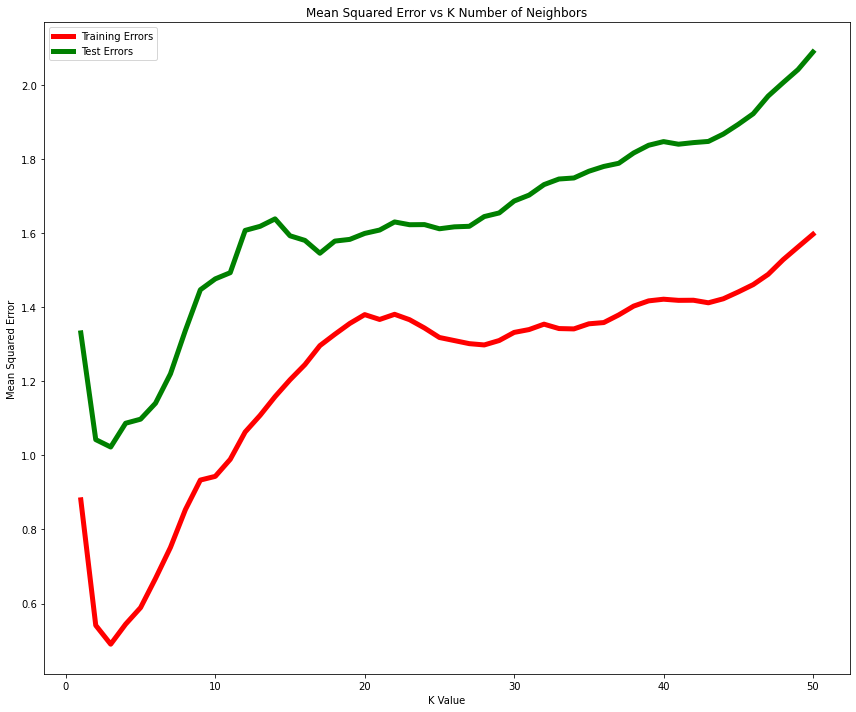

In [16]:
"""plot hyperparameter tuning results"""

plt.figure(figsize=(12, 10))
# error rate (1-accuracy) for given tree depth
plt.plot(k_range, np.array(train_errors), lw=5, c='red')
plt.plot(k_range, np.array(test_errors), lw=5, c='green')
plt.legend(['Training Errors', 'Test Errors'])
plt.title('Mean Squared Error vs K Number of Neighbors')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

### g)	Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this similar to the mse value you got from the algorithm function you wrote from scratch? 

In [17]:
"""
instantiate and fit KNeighborsRegressor sklearn
make predictions on the test set then compute mse
"""

# instantiate the KNeighborsRegressor
knn = KNeighborsRegressor()
# fit the model and make predictions
knn.fit(X_delivery_train, y_delivery_train)
predictions = knn.predict(X_delivery_test)
# compute mse
mean_squared_error(y_delivery_test, predictions, squared=True)


1.093033663366337

The mean squared error produced using the sklearn KNeighborRegressor module is within $\frac{4}{10}$ of a percent of the mean squared error produced by the knn algorithm created from scratch.

### h)	Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the pipeline object to fit the model into the delivery training data. Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [18]:
"""contruct and fit the pipeline"""

# construct the pipeline
knn_pipe = Pipeline([('scalar', StandardScaler()), ('knn', KNeighborsRegressor())])
# fit the pipeline to the training data
knn_pipe.fit(X_delivery_train, y_delivery_train)

Pipeline(steps=[('scalar', StandardScaler()), ('knn', KNeighborsRegressor())])

In [19]:
"""make predictions on the test data then compute mse"""

predicted = knn_pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, predicted, squared=True)

0.9748356435643569

Scaling the data prior to modeling improved the performance of the knn model.

### i)	Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model. Is this mse similar to the one you got in question (h) above?

In [20]:
"""instantiate and fit pipeline for sklearn RandomForestRegressor"""

# construct the pipeline
rfr_pipe = Pipeline([('scalar', StandardScaler()), ('rfr', RandomForestRegressor())])
# fit the pipeline to the training data
rfr_pipe.fit(X_delivery_train, y_delivery_train.to_numpy().flatten())

Pipeline(steps=[('scalar', StandardScaler()), ('rfr', RandomForestRegressor())])

In [21]:
"""make predictions on the test data then compute mse"""

predicted = rfr_pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, predicted, squared=True)

0.9724896929991073

The mean squared error produced by the two models is nearly identical.

## Question 2

### a.	You would use the student data for classification: that is, GPA and Age would be used as input to predict whether a student will drop out of school (Dropped=1) or not drop (Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1. The input that the function takes include:

- X_train: Pandas DataFrame or 2D NumPy array 
- y_train: Pandas Series or 1D NumPy array
- X_test: Pandas DataFrame or 2D NumPy array
- K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call.

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:

![Psuedo Code 2](psuedo_code_2.png)

Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_test set. You can reference the results using a variable, y_student_test_pred. 

In [22]:
"""KNN classifier function"""

def knn_classifier(X_train, y_train, X_test, y_test, k=5):
    # instantiate a list to store predictions
    y_pred = []
    # ensure feature sets converted to numpy array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    # use for loop to iterate over all test instances
    for i in range(0, len(X_test)):
        # get test instance i from test data
        test_instance = np.array([X_test[i]])
        # find the distance between the test instance and all the training instances
        distance = euclidean_distances(X_train, test_instance)
        # stack the distances with Y_train to create matrix
        stacked = np.stack((y_train.Dropped.values, distance.flatten()), axis=1)
        # sort the distances, ascendign then find select the first k values
        stacked = stacked[np.argsort(stacked[:, -1])]
        k_neighbors = stacked[0:k, 0]
        # make a prediction and append to y_pred
        class_frequencies = np.unique(k_neighbors, return_counts=True)
        class_frequencies = np.stack((class_frequencies[0], class_frequencies[1]), axis=1)
        class_frequencies = class_frequencies[np.argsort(class_frequencies[:, -1])]
        y_pred.append(int(class_frequencies[len(class_frequencies)-1][0]))
        
    return y_pred

In [23]:
"""scale data and make predictions"""

# instantiate scalar
scalar = StandardScaler()
# fit and transform train and test sets
X_student_train = scalar.fit_transform(X_student_train)
X_student_test = scalar.fit_transform(X_student_test)
# make predictions
y_student_pred = knn_classifier(X_student_train, y_student_train, X_student_test, y_student_test)

### b)  Define a function called overall_accuracy, that computes the overall accuracy of your algorithm. You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred)

In [24]:
"""create overall accuracy function"""

def overall_accuracy(y_actual, y_predicted):

    # coerce actual and predicted values to numpy arrays
    y_actual = np.array(y_actual).flatten()
    y_predicted = np.array(y_student_pred)
    # compute mean of correct predictions
    return np.mean(y_actual == y_predicted)
   
overall_accuracy(y_student_test, y_student_pred)

0.8

### c) Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set. Is this accuracy score similar to that obtained using your knn algorithm from scratch?

In [25]:
"""apply grid search cross validation with knn clasifier and extract the best k"""

# instantiate the estimator and set params grid
knn_classifier = KNeighborsClassifier()
params = {'n_neighbors': range(1, 51)}
# instantiate and fit grid search
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=params, cv=3)
knn_grid_search.fit(X_student_train, y_student_train.to_numpy().ravel())
print("The optimal k for the knn calssifier is:", knn_grid_search.best_params_)

The optimal k for the knn calssifier is: {'n_neighbors': 14}


In [26]:
"""make predictions using best estimator form grid search"""

# use the best estimator to make predictions
knn_classifier = knn_grid_search.best_estimator_
knn_classifier.score(X_student_test, y_student_test)

0.77

The knn classifier fit using grid search produced slightly more pore results than the knn algorithm created from scratch.

### Also build another model using a random forest classifier and compute the accuracy score on the test set. Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

In [27]:
"""reload the data and start fresh for valid comparison"""

X_student_train = student_train[['GPA', 'Age']]
y_student_train = student_train[['Dropped']]

X_student_test = student_test[['GPA', 'Age']]
y_student_test = student_test[['Dropped']]

In [28]:
"""instantiate and fit pipeline for sklearn RandomForestRegressor"""

# construct the pipeline
rfc_pipe = Pipeline([('scalar', StandardScaler()), ('rfc', RandomForestClassifier())])
# fit the pipeline to the training data
rfc_pipe.fit(X_student_train, y_student_train.to_numpy().flatten())

Pipeline(steps=[('scalar', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [29]:
"""compute the accuracy score for random forest classifier"""
rfc_pipe.score(X_student_test, y_student_test.to_numpy().flatten())

0.99

The model in question 2d drastically outperformed the model created in question 2c. This is likely due to the fact that ensemble models commonly outperform many other classifiers. The random forest classifier was able to separate data by class label much more accurately than the knn classifier.

## Question 3: Your own mini project

Address the following and include code/output snippets from b) to f). Include the response under each sub question. 

### a)	State your research question 

Sales opportunities can be simply defined as sales accounts that have been qualified as showing legitimate interest in purchasing a product or service from another business entity. Attributes regarding sales opportunities are often tracked for the purpose of developing targeted sales campaigns. Attributes may include things such as, name of the primary contact associated with an opportunity, annual revenue of the company associated with a given sales opportunity, etc. A sales opportunity that results in a sale is referred to as a win. An opportunity that does not result in a sale is referred to as a loss. Using past observations of won and lost opportunities can a K-Nearest Neighbors classifier be used to predict win or loss (1/0) for opportunities currently in an organization's sales pipeline.

__Data Dictionary__

- Est_Revenue - The estimated revenue expected if a sales opportunity is won.

- Annual_Revenue - The annual revenue of the company listed on the sales account associated with a given sales opportunity.

- days_active - The number of days an opportunity record was active before being closed as a win or loss. This feature was extracted by subtracting System_Close_Date from Created_On (record creation date) for a given opportunity.

- No_of_Employees - The number of employees working for the business listed on the sales account record that is associated with a given opportunity.

- Won - Binary outcome for a given sales opportunity reccord (1 = won 0 = lost)

ASIDE: This data was obtained from my current employer's historical records and should not be shared or re-used outside of this assignment.

### b)	Data pre-processing (to the extent deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale). 

In [30]:
"""load opportunity data and check for missing values"""

opportunities = pd.read_csv('opportunities.csv')
opportunities.set_index('opportunity_id', inplace=True)
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593 entries, 7e8506e1-2c9b-e711-8118-005056ad09ed to d3ab2c66-ec15-e711-8114-005056ad6943
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Est_Revenue      2593 non-null   float64
 1   Annual_Revenue   2593 non-null   float64
 2   days_active      2593 non-null   float64
 3   No_of_Employees  2593 non-null   float64
 4   Won              2593 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.5+ KB


In [31]:
opportunities.iloc[:, :-1]

,Est_Revenue,Annual_Revenue,days_active,No_of_Employees
opportunity_id,,,,
7e8506e1-2c9b-e711-8118-005056ad09ed,1440.0,2.685559e+07,5.659109,102.0
b0cfd616-2d9b-e711-8118-005056ad09ed,102960.0,3.015769e+08,8.656319,1300.0
8549a452-2d9b-e711-8118-005056ad09ed,1276.0,3.015769e+08,118.617407,1300.0
a8a8986a-2d9b-e711-8118-005056ad09ed,3900.0,5.003124e+07,30.517836,200.0
fbaf8b76-2d9b-e711-8118-005056ad09ed,2690.0,2.360940e+07,52.671296,238.0
...,...,...,...,...
e090398a-5bd3-eb11-a9d4-005056b5913b,50000.0,0.000000e+00,2.282326,700.0
1ef981ce-f30a-e811-812b-005056ad4f9d,8000.0,0.000000e+00,139.605613,700.0
c5384e12-8315-e811-812b-005056ad4f9d,3000000.0,2.863501e+08,73.186146,615.0


In [33]:
"""apply preprocessing to the data"""

scaler = MinMaxScaler()
# fit and transform numeric features
opportunities.iloc[:, :-1] = scaler.fit_transform(opportunities.iloc[:, :-1])

### c)	Data splitting 

In [34]:
"""partition the data into training and test sets"""

X = opportunities.iloc[:, :-1]
y = opportunities.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

### d)	Model construction 

In [35]:
"""construct a KNeighborsClassifier sklearn"""

# instantiate estimator
knn_classifier = KNeighborsClassifier()

In [36]:
"""apply grid search cross validation with KNeighbors classifier and extract the best parameters"""

params = {'n_neighbors': range(1, 51), 'algorithm':['ball_tree', 'kd_tree', 'brute']}
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=params, cv=3)
knn_grid_search.fit(X_train, y_train.to_numpy().ravel())
print("The optimal hyperparameters for the knn calssifier are:", knn_grid_search.best_params_)

The optimal hyperparameters for the knn calssifier are: {'algorithm': 'ball_tree', 'n_neighbors': 47}


### f)	Use the best or optimal parameter values to build a model, then compute the accuracy score for your estimator. 

In [37]:
"""use the best estimator to make predictions on the training data"""

knn_classifier = knn_grid_search.best_estimator_
knn_classifier.score(X_train, y_train)

0.7553719008264462

In [38]:
"""use the best estimator to make predictions on the test data"""

knn_classifier.score(X_test, y_test)

0.7493573264781491

Discuss about overfitting the model.

Performing grid search cross-validation to select the optimal hyperparameters for fitting a KNeighborsClassifier estimator to the sales opportunity data produced strong results. The accuracy of the model in predicting win/loss for opportunity records in the training set was approximately 76%. Accuracy in predicting win/loss for opportunity records in the test set was approximately 75%. The model did not over fit the training data and outperformed the naive model which classifies opportunity records as win or loss with an accuracy of approximately 61%.